# **6. Conclusão**

Este capítulo final traz alguns pontos importantes sobre a Análise de Séries Temporais que não tratamos neste texto introdutório, mas que são importantes para que você possa compreender os problemas que envolvem a Análise de Séries Temporais no tratamento de dados reais e as limitações das técnicas elementares apresentadas neste livro. Ao final relacionamos algumas técnicas e modelos de previsão de análise mais elaborados e que não tratamos neste texto. Eles, entretanto, desempenham papel importante em uma série de problemas e você poderá encontrar mais sobre eles consultando a Bibliografia Comentada ao final deste livro. 

___









In [ ]:
#@markdown `imports`
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/tsp.mplstyle' ])


# Desafios de Dados Reais

A análise de Séries Temporais e uma das tarefas mais comuns na Ciência de Dados, com aplicações tanto nas empresas (previsão da demanda de produtos e serviços, definição de preços, no planejamento de capacidade) como na ciência em geral (previsão climática, crescimento econômico e demográfico, índices de desmatamento e emissões). Mais recentemente ainda, a digitalização e sensores (IoT) passaram a produzir uma enorme quantidade de dados para o monitoramento de sistemas e dispositivos, em que a análise dos dados permite prever falhas, antecipar comportamentos e necessidades. 

Não obstante ser uma tarefa comum e importante, a análise de Series Temporais é uma das análises mais complexas quando se trata de dados reais, e há poucos profissionais capacitados para esse tipo de análise. Achamos importante, portanto, apontar aqui alguns desafios que você pode encontrar ao lidar com casos reais de análise.

> **Alguns dos Principais Desafios de Dados Reais**
>> * **Qualidade dos Dados**
>> * **Múltiplas Séries de Dados**
>> * **Hierarquia dos Dados**
>> * **Eventos Externos**
>> * **Múltiplas Sazonalidades e Aleatoriadade**


## Qualidade dos Dados
Neste, ou em qualquer livro texto, você não deve encontrar muitos problemas com a qualidade dos dados. Afinal, você precisa ter bons dados para entender e experimentar os algoritmos e modelos. Mas em casos reais há uma enormidade de problemas quando tratamos de dados. Os principais consistem em haver dados ausentes, erros nos dados (valores, formatos etc.) e inconsistências entre diversas fontes de dados. Também é comum encontrarmos dados com lacunas, intermitência ou esparsos, ou ainda dados que não apresentam um intervalo fixo de tempo entre os valores da Série. Todos esses são problemas bastante comuns, e que precisam ser de algum modo tratados antes de empregarmos técnicas como as apresentadas neste livro.  

In [ ]:
#@markdown Data 1  
%%capture
!wget https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/AirQualityUCI.zip

!unzip AirQualityUCI.zip
!ls /content

df1 = pd.read_csv('AirQualityUCI.csv',sep=';')

df1 = df1[ - df1.Date.isnull() ]

index_dates = pd.date_range(start='03/10/2004 18:00:00', end='04/04/2005 14:00:00', freq='H')
df1.index = index_dates
df1['T'] = df1['T'].str.replace(',','.').astype('float64')



/usr/local/lib/python3.10/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname CET identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [ ]:
#@markdown Data 2
df2 = pd.read_csv(path + 'IoTpond1.csv')
df2 = df2[ df2.created_at.str.contains('CET') ]
df2.set_index( pd.to_datetime( df2.created_at ) ,drop=True, inplace=True )

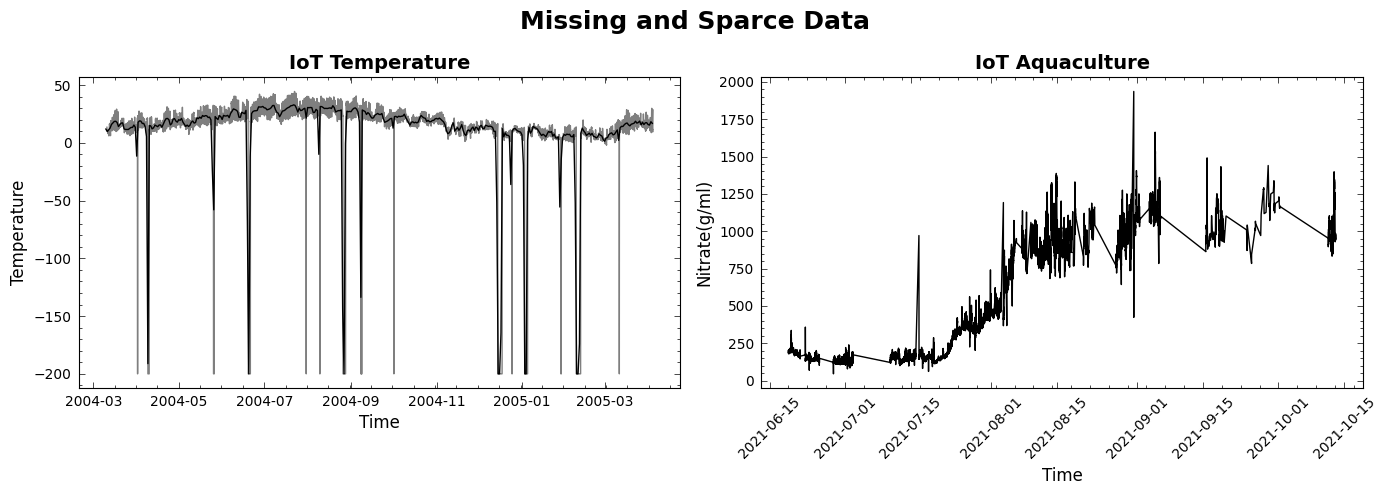

In [ ]:
#@markdown Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

plt.suptitle('Missing and Sparce Data')
ax1.plot(df1[['T']],alpha=0.5)
ax1.plot(df1[['T']].resample('D').mean(),c='k')

ax1.set_title('IoT Temperature')
ax1.set_ylabel('Temperature')
ax1.set_xlabel('Time')

f = sns.lineplot(x=df2.index, y=df2['Nitrate(g/ml)'],ax=ax2)

ax2.set_title('IoT Aquaculture')
ax2.set_ylabel('Nitrate(g/ml)')
ax2.set_xlabel('Time')
ax_f= plt.axes(f)
ax_f.tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

> **Figura 1. Dados de sensores de IoT de Temperatura e de concentração de Nitrato em um tanque de Aquacultura. Interrupções nos dispositivos ou na rede casam frequentemente perda de dados e mesmo podem gerar dados esparsos.** 

## Múltiplas Séries de Dados

Exceto nos capítulos 4 e 5, em que desenvolvemos modelos com uma variável exógena, neste livro tratamos principalmente da previsão de uma única série temporal. Em casos reais e de maior complexidade, podem ser necessárias várias séries temporais que se relacionam, para se fazer uma previsão adequada. Modelos bem mais sofisticados do que os que apresentamos aqui são necessários para esse tipo de Séries. 

In [ ]:
#@markdown Data 1 
df3 = pd.read_csv(path + '/london_merged.csv')
df3.index = pd.to_datetime(df3.timestamp)
df3.index.name = ''

df3 = df3[ (df3.index.year == 2015) & (df3.index.month <= 2) ]
df_day = df3.resample('D').max()
# df3.head()


In [ ]:
#@markdown Data 2
%%capture
!pip install pytrends
from pytrends.request import TrendReq
pytrend = TrendReq()

pytrend.build_payload(kw_list=['NetFlix','Amazon Prime','HBO Max','Disney+','GloboPlay'], cat=0, timeframe='2020-01-01 2023-01-01', geo='BR')
df4 = pytrend.interest_over_time()


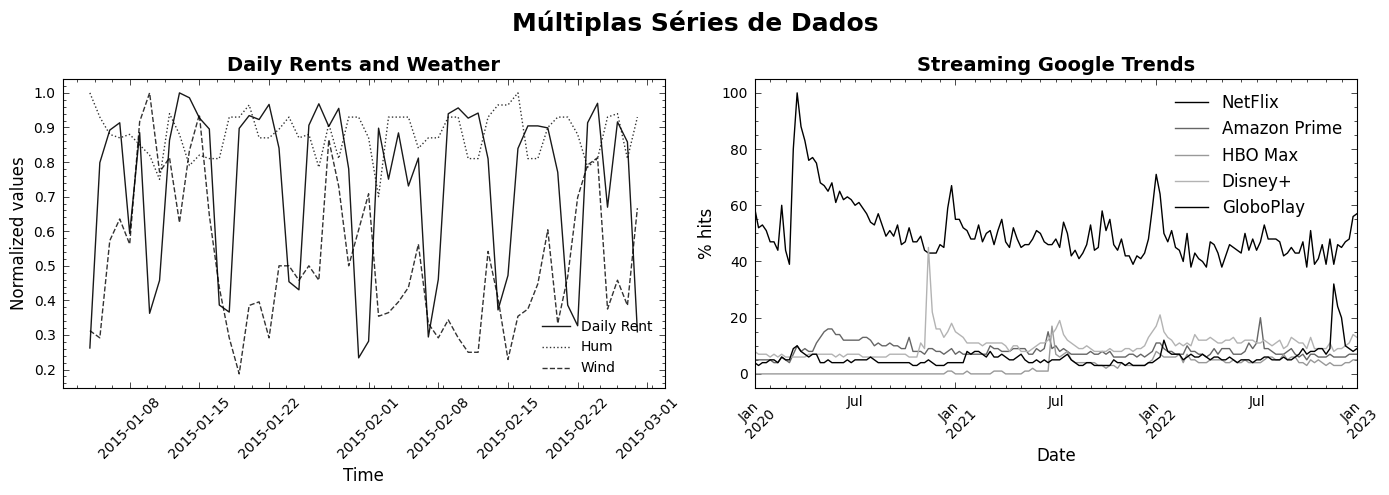

In [ ]:
#@markdown Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

plt.suptitle('Múltiplas Séries de Dados')

sns.lineplot(x=df_day.index, y =df_day.cnt / df_day.cnt.max(), linestyle='-', color='k', alpha=0.9, label='Daily Rent',ax=ax1)
sns.lineplot(x=df_day.index, y =df_day.hum / df_day.hum.max(), linestyle=':', color='k', alpha=0.8, label='Hum',ax=ax1)
f = sns.lineplot(x=df_day.index, y =df_day.wind_speed / df_day.wind_speed.max(), linestyle='--', color='k', alpha=0.8, label='Wind',ax=ax1)

ax1.set_title('Daily Rents and Weather')
ax1.set_ylabel('Normalized values')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', labelsize=10, labelrotation=45)
ax1.legend(loc='lower right')

df4.drop(columns='isPartial').plot(ax=ax2)

ax2.set_title('Streaming Google Trends')
ax2.set_xlabel("Date")
ax2.set_ylabel("% hits")
ax2.tick_params(axis='x', labelsize=10, labelrotation=45)

ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

> **Figura 2. Múltiplas Séries de Dados. No primeiro caso variáveis de clima influenciam o maior ou o menor aluguel de bicicletas de passeio. No segundo, em um caso mais complexo, as buscas por diferentes serviços de *streaming* têm influência mútua entre si.** 

## Hierarquia dos Dados

A reconciliação de previsões em uma hierarquia de séries temporais é um tema bastante atual em Séries Temporais. A ideia é de que muitas Séries Temporais aparecem de forma *hierarquizada*. Por exemplo, você trabalhar com Séries de Vendas de lojas individuais, que podem ser agregadas em vendas por região ou país, e que podem ainda ser agregadas para as vendas totais. Você pode pensar também no próprio tempo como uma hierarquia, com Séries com dados horários, diários e mensais. Você pode gerar previsões nos vários níveis e empregar o melhor em cada nível. Mas somente uma reconciliação dessas previsões pode dar uma *coerência* a essas previsões, o que parece ser bastante interessante, mas ainda é algo que é objeto de pesquisa. 

In [ ]:
#@markdown Data
df3 = pd.read_csv(path + '/london_merged.csv')
df3.index = pd.to_datetime(df3.timestamp)
df3.index.name = ''

df_day = df3.resample('D').max()
df_week = df3.resample('W').max()
df_month = df3.resample('M').max()

<ipython-input-232-28ccfb3bf1e8>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x=df2.resample('D').mean().index, y=df2.resample('D').mean()['Nitrate(g/ml)'],linestyle='-', color='k', alpha=0.9, label='Daily Nitrate',ax=ax2)
<ipython-input-232-28ccfb3bf1e8>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  f =sns.lineplot(x=df2.resample('W').mean().index, y=df2.resample('W').mean()['Nitrate(g/ml)'],linestyle='--', color='k', alpha=0.9, label='Weekly Nitrate',ax=ax2)
<ipython-input-232-28ccfb3bf1e8>:19: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. I

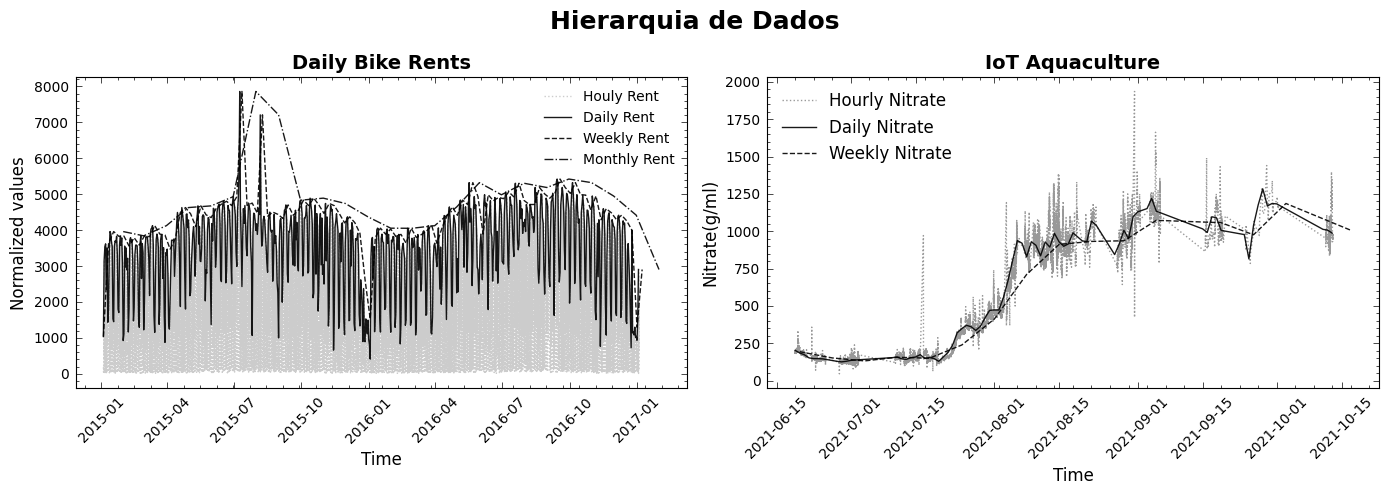

In [ ]:
#@markdown Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

plt.suptitle('Hierarquia de Dados')

sns.lineplot(x=df3.index, y =df3.cnt, linestyle=':', color='k', alpha=0.2, label='Houly Rent',ax=ax1,lw=1)
sns.lineplot(x=df_day.index, y =df_day.cnt , linestyle='-', color='k', alpha=0.9, label='Daily Rent',ax=ax1,lw=1)
sns.lineplot(x=df_week.index, y =df_week.cnt , linestyle='--', color='k', alpha=0.9, label='Weekly Rent',ax=ax1)
f = sns.lineplot(x=df_month.index, y =df_month.cnt , linestyle='-.', color='k', alpha=0.9, label='Monthly Rent',ax=ax1)

ax1.set_title('Daily Bike Rents')
ax1.set_ylabel('Normalized values')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', labelsize=10, labelrotation=45)
ax1.legend(loc='upper right')

sns.lineplot(x=df2.index, y=df2['Nitrate(g/ml)'], linestyle=':', color='k', alpha=0.4, label='Hourly Nitrate',ax=ax2,lw=1)
sns.lineplot(x=df2.resample('D').mean().index, y=df2.resample('D').mean()['Nitrate(g/ml)'],linestyle='-', color='k', alpha=0.9, label='Daily Nitrate',ax=ax2)
f =sns.lineplot(x=df2.resample('W').mean().index, y=df2.resample('W').mean()['Nitrate(g/ml)'],linestyle='--', color='k', alpha=0.9, label='Weekly Nitrate',ax=ax2)

ax2.set_title('IoT Aquaculture')
ax2.set_ylabel('Nitrate(g/ml)')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', labelsize=10, labelrotation=45)

ax2.legend(fontsize=12)

plt.tight_layout()
plt.show()

> **Figura 3. Dados com Hierarquia de Tempo: horário, diário, semanal e mensal. Previsões podem ser feitas em qualquer nível e uma busca de *coerência* entre as previsões pode ser algo difícil de se obter.** 

## Eventos Externos

Muitas Séries de Dados reais estão sujeitas a diversos fatores externos. Você pode pensar nos valores das ações da bolsa, das moedas e o preço dos combustíveis. Todos estão sujeitos a grandes variações por eventos externos como alterações de governo, políticas, leis, guerra, greves e outros fatos que ocorrem nos mercados. Previsões para dados como esses podem ser bastante frustrantes pois os fatos externos alteram as condições passadas e não permite que nossos métodos façam previsões melhores. Isso ocorre também com os ciclos econômicos (veja o Capítulo 1), com resultados de vendas que são alterados por uma campanha ou um noticiário ou dados de epidemias que não temos conhecimento de como pode evoluir. 

In [ ]:
#@markdown Data 1
%%capture
!wget https://github.com/Introducao-Series-Temporais-em-Python/Book/raw/main/Data/owid-covid-data.zip

!unzip owid-covid-data.zip
!ls /content

df4 = pd.read_csv('owid-covid-data.csv')
df4 = df4[ df4.location == 'Brazil' ][['date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'total_tests', 'new_tests',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'total_vaccinations',
       'people_vaccinated',
       'new_vaccinations', 'new_vaccinations_smoothed',
      ]]

df4.index = pd.to_datetime(df4.date)
df4.index.name = ''
# df4.head()

In [ ]:
#@markdown Data 2
%%capture
!pip install yfinance
!pip install yahoofinancials

from yahoofinancials import YahooFinancials

stocks_names = ['EMBR3.SA','USDBRL=X','BTC-USD']

stocks = {}

for stock_name in stocks_names:
  yahoo_financials = YahooFinancials(stock_name)
  data=yahoo_financials.get_historical_price_data("2012-01-01", "2023-05-01", "monthly")

  df5 = pd.DataFrame(data[stock_name]['prices'])
  df5.index = pd.to_datetime(df5.formatted_date)
  df5.index.name = ''
  df5 = df5.drop(columns=['date','formatted_date'])
  stocks[ stock_name ] = df5

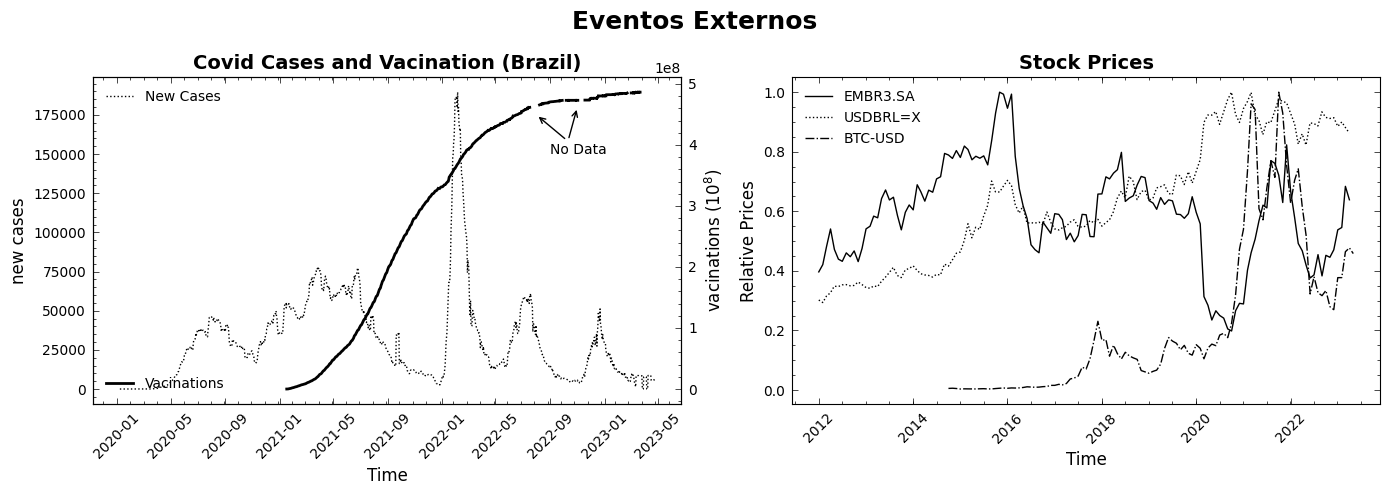

In [ ]:
#@markdown Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

plt.suptitle('Eventos Externos')

ax1.plot( df4.index, df4.new_cases_smoothed, linestyle=':', label='New Cases' )

ax3 = ax1.twinx()
ax3.plot( df4.index, df4.total_vaccinations, label='Vacinations', linestyle='-',lw=2)
ax1.tick_params(axis='x', labelsize=10, labelrotation=45)
ax1.legend(loc='upper left')
ax3.legend(loc='lower left')

ax1.set_title('Covid Cases and Vacination (Brazil)')
ax1.set_ylabel('new cases')
ax3.set_ylabel('vacinations ($10^8$)')
ax1.set_xlabel('Time')
ax1.annotate('No Data', 
             xy=(pd.to_datetime('2022-08-01'),175000),      
             xytext=(pd.to_datetime('2022-09-01'),150000),           
             arrowprops=dict(arrowstyle="->")) 
ax1.annotate('       ', 
             xy=(pd.to_datetime('2022-11-01'),180000),      
             xytext=(pd.to_datetime('2022-09-01'),150000),           
             arrowprops=dict(arrowstyle="->")) 

for linestyle, stock in zip(['-',':','-.'],['EMBR3.SA','USDBRL=X','BTC-USD']):
  df = stocks[ stock ]
  ax2.plot(df.index, df.close / df.close.max(), label=stock, linestyle=linestyle,c='k') 
ax2.tick_params(axis='x', labelsize=10, labelrotation=45)

ax2.set_title('Stock Prices')
ax2.set_ylabel('Relative Prices')
ax2.set_xlabel('Time')
ax2.legend()

plt.tight_layout()
plt.show()

> **Figura 4. Diferentes Eventos Externos afetam os valores ao longo do tempo no caso da Pandemia de COVID-19 e da evolução do preço de ativos da Bolsa (ações da Embraer, Dólar Americano e Bitcoin).** 

## Múltiplas Sazonalidades & Aleatoriedade

Também não será pouco frequente você encontrar dados que tenham múltiplas sazonalidades ou um comportamento aleatório, sem a presença de tendência ou sazonalidades. Consumo de produtos e serviços estão em geral sujeitos a múltiplas sazonalidades, por horário, dias da semana e meses do ano, e você pode pensar no consumo de refeições ou ainda de filmes em um canal de streaming. Já dados aleatórios são dados em que não há de fato nenhum padrão a ser capturado e, qualquer modelo, como os que estudamos aqui são insuficientes para uma previsão. Muitos fenômenos físicos apresentam esse comportamento, ou próximo disso.



In [ ]:
#@markdown Data 1
df6 = pd.read_csv( path + 'Delta_LOD.csv',sep=';',usecols=['year', 'month', 'day', 'lod(ms)', 'sig(ms)']) 
df6.index = pd.to_datetime(df6[["year", "month", "day"]])


In [ ]:
#@markdown Data 2
index_dates = pd.date_range(start='01/01/2000', end='01/01/2023', freq='M')
df7 = pd.DataFrame()
df7.index = index_dates
df7['values'] = np.random.random_sample(len(df7))


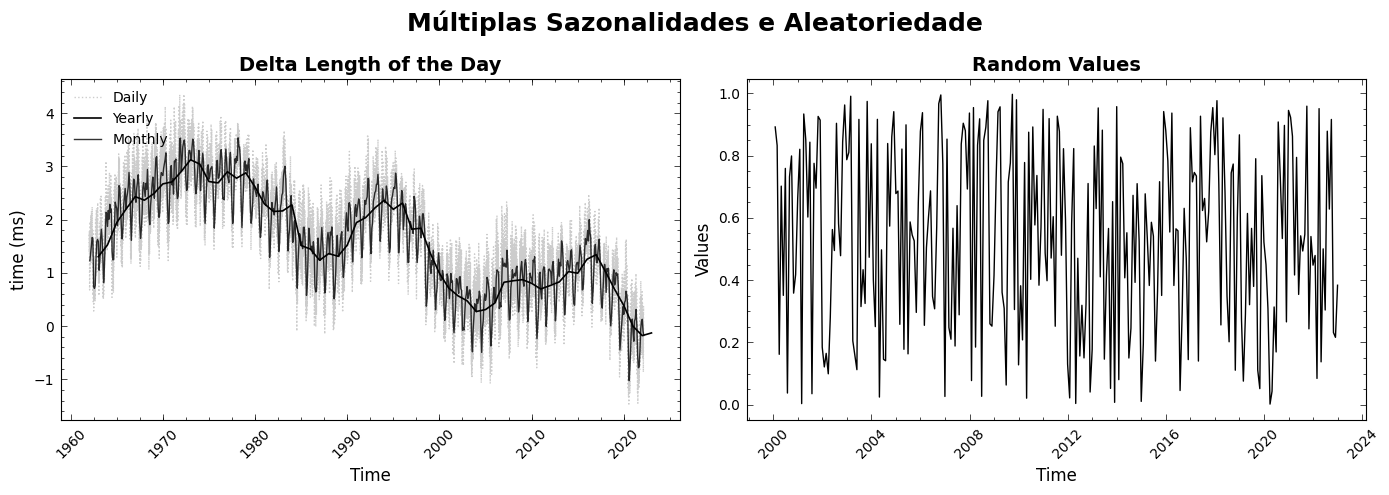

In [ ]:
#@markdown Plot
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5))

plt.suptitle('Múltiplas Sazonalidades e Aleatoriedade')

df_year = df6[['lod(ms)']].resample('Y').mean()
df_month = df6[['lod(ms)']].resample('M').mean()

sns.lineplot(x=df6.index, y=df6['lod(ms)'],label='Daily',ax=ax1,linestyle=':',color='k',alpha=0.2)
sns.lineplot(x=df_year.index, y=df_year['lod(ms)'],label='Yearly',ax=ax1,linestyle='-',color='k',alpha=1,lw=1.2)
sns.lineplot(x=df_month.index, y=df_month['lod(ms)'],label='Monthly',ax=ax1,linestyle='-',color='k',alpha=0.8)

ax1.tick_params(axis='x', labelsize=10, labelrotation=45)
ax1.legend(loc='upper left')

ax1.set_title('Delta Length of the Day')
ax1.set_ylabel('time (ms)')
ax1.set_xlabel('Time')

ax2.plot(df7.index, df7.values, c='k') 
ax2.tick_params(axis='x', labelsize=10, labelrotation=45)

ax2.set_title('Random Values')
ax2.set_ylabel('Values')
ax2.set_xlabel('Time')

plt.tight_layout()
plt.show()

> **Figura 3. Variações de ms no tempo da rotação da terra encontram diferentes periodicidades, algumas de vários anos. Ao lado, uma sequência de valores randômicos, aparecem como uma Série Temporal. A única componente dos dados, entretanto, é constituída de ruído e não é, portanto, previsível.** 

# Outros Modelos e Técnicas

Existem muitas outras técnicas e modelos para previsões e análise de Séries Temporais que não tratamos nesse texto introdutório. Aqui, basicamente nos limitamos a empregar aqui modelos auto-regressivos e introduzir o uso de modelos de aprendizado de máquina (capítulo anterior). Mas há ainda, pelo menos, três classes de modelos importante que podemos considerar:

* Modelos de Espaços de Estado
* Análise Espectral
* Modelos Multivariados
* Modelos de Volatilidade




## Modelos de Espaços de Estado

Modelos de Espaço de Estados modelam Séries Temporais como sistema dinâmico por equações do tipo: 

$$x_t = Fx_{t-1} + v_t$$

onde $F$ é uma matriz de transições de estado (ou das *observações*). Esses modelos são em geral não lineares e encontram **aplicações no campo de tratamento de sinais,  filtros, astronomia** etc. Filtros Kalman e técnicas de Controle e Identificação de Sistemas estão diretamente associadas a esses modelos. 



## Análise Espectral 

Ao longo de todo o texto tratamos das Séries Temporais considerando o Domínio do Tempo, isto é, estávamos interessados nos valores ao longo do tempo. A análise espectral envolve analisarmos uma Série Temporal em suas componentes de frequência, isto é, no Domínio da Frequência. A ferramenta principal para isso é transformada de Fourier, que converte uma Série Temporal no domínio do tempo para o domínio da frequência. É uma análise **útil para identificar principalmente periodicidades múltiplas** (sazonalidades) nos dados e apresenta muitas aplicações no campo da meteorologia, física, astronomia e ciências em geral. 



## Modelos Multivariados

Modelos Multivariados se aplicam quando há mais de uma série temporal envolvida. Nos capítulos 4 e 5 chegamos empregar duas séries de dados sendo uma delas uma variável exógena (velocidade do tempo) e a outra a variável de interesse (número de aluguéis de bicicletas). É um caso bastante particular e, em geral, preferimos empregar o termo modelo de variável exógena. Os modelos multivariados são mais amplos e **buscam modelar a relação entre várias diferentes séries temporais** podendo ser empregadas para fazer previsões para mais de uma das séries. Dentre os modelos mais empregados desta classe encontram-se os modelos **VAR e VARIMA (vetor autorregressivo integrado de média móvel)**. Esses modelos permitem modelar a dinâmica entre variáveis que interagem mutuamente, quando uma variável influencia a outra. Na prática esses modelos consideram as correlações dos valores das séries com os seus próprios *lags*, mas também com os *lags* das séries das outras variáveis.







## Modelos de Volatilidade

Esses modelos são usados para modelar Séries que apresentam **volatilidade, ou variância, condicional** ao longo do tempo. Em boa parte dos modelos tratados aqui a estacionariedade da Série foi um pré-requisito. Este, entretanto, não é o caso de um grande conjunto de dados de **Séries Financeiras**, onde os valores podem apresentar grande volatidade (diferentes variâncias ao longo do tempo, ou **heterocedasticidade**). Assim, Modelos de Volatilidade têm grande uso em problemas bastante práticos de Séries Financeiras e do **Mercado de Ações**. A ideia a variação de preços de uma ação em um dado dia (sua volatilidade) pode influenciar variação do preço da ação nos dias seguintes, e *modelar* essa variação é o principal objetivo desses modelos. Aqui, os modelos **ARCH e GARCH (Modelo Autoregressivo Generalizado de Heterocedasticidade Condicional)** são os modelos normalmente empregados, sendo o modelo GARCH uma generalização para dados multivariados do modelo ARCH, empregado para dados univariados.



Você pode encontrar mais sobre esses modelos na Bibliografia Comentada ao final deste livro, principalmente nos títulos **Avançados & *No Code*** e **Outros Títulos Avançados de Interesse**.

<br>
<br>

# Mensagem Final

Esperamos que este livro tenha sido útil para desmistificar as Séries Temporais e ajudá-lo a iniciar a  construção de seus próprios modelos. Ao longo do texto, e principalmente neste último capítulo, você pôde entender que a Análise e a Previsão de Séries Temporais é um assunto amplo e complexo. É fácil, portanto, se sentir perdido e não saber por onde começar e buscamos, neste livro, proporcionar a você este ponto de partida.

Encorajamos você a continuar a explorar esse campo complexo e desafiador, confiantes de que você agora tem a base necessária para aplicar esses conceitos em suas próprias pesquisas, projetos e análises de dados.

Obrigado por escolher este livro e por nos acompanhar nesta jornada de descoberta e aprendizado sobre Séries Temporais.

<br>

<p style="text-align: right;"><b>Os Autores</p>





